<a href="https://colab.research.google.com/github/KyathiSushmaA/Test1/blob/main/Copy_of_Marks_Channels_Seaborn_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marks and Channels with Seaborn Objects Tutorial

Marks, channels, and data types are the building blocks of creating charts and visualizations. We will use this terminology in our coding examples.

From Chapter 5 in [VAD](https://www.cs.ubc.ca/~tmm/vadbook/):
* "*marks* are the basic geometric elements that depcit items or links"
* "*channels* control their [marks] appearance"
* "the effectiveness of a channel for encoding data depends on its *type*"

References:
* A Quick Introduction to the Seaborn Objects System, https://www.sharpsightlabs.com/blog/seaborn-objects-introduction/
* The seaborn.objects interface, https://seaborn.pydata.org/tutorial/objects_interface.html
* Properties of Mark objects, https://seaborn.pydata.org/tutorial/properties.html

To work along with this tutorial, sign in to your Google account and File > Save a copy in Drive.

## Data

First, we'll import the dataset that we'll use for this tutorial.  We will visualize global health and population measures for countries of the world, recorded over the years 1955 to 2005. The data was collected by the [Gapminder Foundation](https://www.gapminder.org/) and shared in [Hans Rosling's popular TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w). (If you haven't seen the talk, I encourage you to watch it!)

(The vega-datasets GitHub repo has lots of sample datasets that you can use to practice, see https://github.com/vega/vega-datasets/blob/main/SOURCES.md.)

We'll use Pandas to import the gapminder.json datafile into a dataframe.

In [38]:
import pandas as pd

In [39]:
df = pd.read_json('https://cdn.jsdelivr.net/npm/vega-datasets@2/data/gapminder.json')

In [40]:
print (df.head())

   year      country  cluster       pop  life_expect  fertility
0  1955  Afghanistan        0   8891209       30.332        7.7
1  1960  Afghanistan        0   9829450       31.997        7.7
2  1965  Afghanistan        0  10997885       34.020        7.7
3  1970  Afghanistan        0  12430623       36.088        7.7
4  1975  Afghanistan        0  14132019       38.438        7.7


For each `country` and `year` (in 5-year intervals), we have measures of fertility in terms of the number of children per woman (`fertility`), life expectancy in years (`life_expect`), and total population (`pop`).

Next, we'll create some smaller dataframes that we'll use later. The one below should contain the data only for the year 2000.

In [41]:
df_2000 = df.query("year == 2000")
print (df_2000.head())

    year      country  cluster       pop  life_expect  fertility
9   2000  Afghanistan        0  23898198       42.129     7.4792
20  2000    Argentina        3  37497728       74.340     2.3500
31  2000        Aruba        3     69539       73.451     2.1240
42  2000    Australia        4  19164620       80.370     1.7560
53  2000      Austria        1   8113413       78.980     1.3820


This one has data for countries labeled cluster 1 in the year 2000.

In [42]:
df_2000c1 = df_2000.query("cluster == 1")
print(df_2000c1.head())

     year  country  cluster       pop  life_expect  fertility
53   2000  Austria        1   8113413       78.980     1.3820
97   2000  Belgium        1  10263618       78.320     1.6380
185  2000  Croatia        1   4410830       74.876     1.3480
251  2000  Finland        1   5168595       78.370     1.7540
262  2000   France        1  59381628       79.590     1.8833


We'll also create a dataset that has values only for the US.

In [43]:
df_US = df.query("country == 'United States'")
print(df_US.head())

     year        country  cluster        pop  life_expect  fertility
671  1955  United States        3  165931000        69.49      3.706
672  1960  United States        3  180671000        70.21      3.314
673  1965  United States        3  194303000        70.76      2.545
674  1970  United States        3  205052000        71.34      2.016
675  1975  United States        3  215973000        73.38      1.788


Finally, we'll have a set with only a few countries.

In [44]:
df_5countries = df.query("country in ('United States', 'France', 'Austria', 'Brazil', 'Germany')")
print(df_5countries.head())

    year  country  cluster      pop  life_expect  fertility
44  1955  Austria        1  6946885        67.48       2.52
45  1960  Austria        1  7047437        69.54       2.78
46  1965  Austria        1  7270889        70.14       2.53
47  1970  Austria        1  7467086        70.63       2.02
48  1975  Austria        1  7578903        72.17       1.64


## Seaborn's Objects Interface

In September 2022, the seaborn.objects interface was released. It is based on the [Grammar of Graphics](https://vita.had.co.nz/papers/layered-grammar.pdf), which is what R's [ggplot2](https://ggplot2.tidyverse.org/) is also based on. So, if you've created charts in R before, this should be a bit familiar. It also follows along with the VAD textbook's terminology of marks and channels.

First, we need to import the library:

In [45]:
import seaborn as sns
import seaborn.objects as so

Every Seaborn Objects chart uses the [`so.Plot()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.html) function.

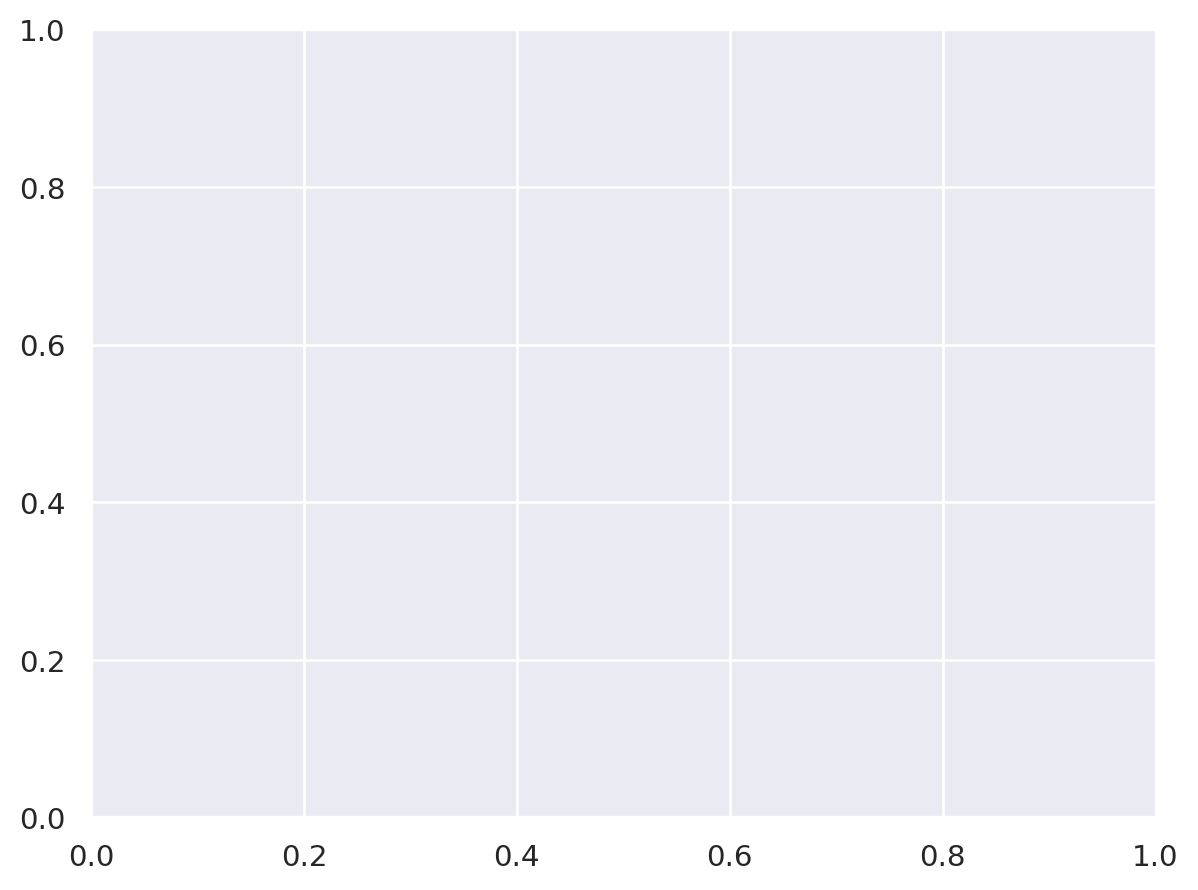

In [46]:
so.Plot()

Note that inside the notebook environment, you don't need to explicitly call the [`show()`](https://seaborn.pydata.org/generated/seaborn.objects.Plot.show.html) function, but if you want to run these scripts locally, you'll need to add `.show()` as the final command: `so.Plot().show()`

`so.Plot()` takes several parameters, the most important of which are `data`, `x`, and `y`. As you might expect, `data` specifies the dataframe to use.

Most charts will map data to the position channels, so `x` specifies the attribute (column in the dataframe) to be mapped to the horizontal position *channel*, and `y` specifies the attribute to be mapped to the vertical position *channel*.

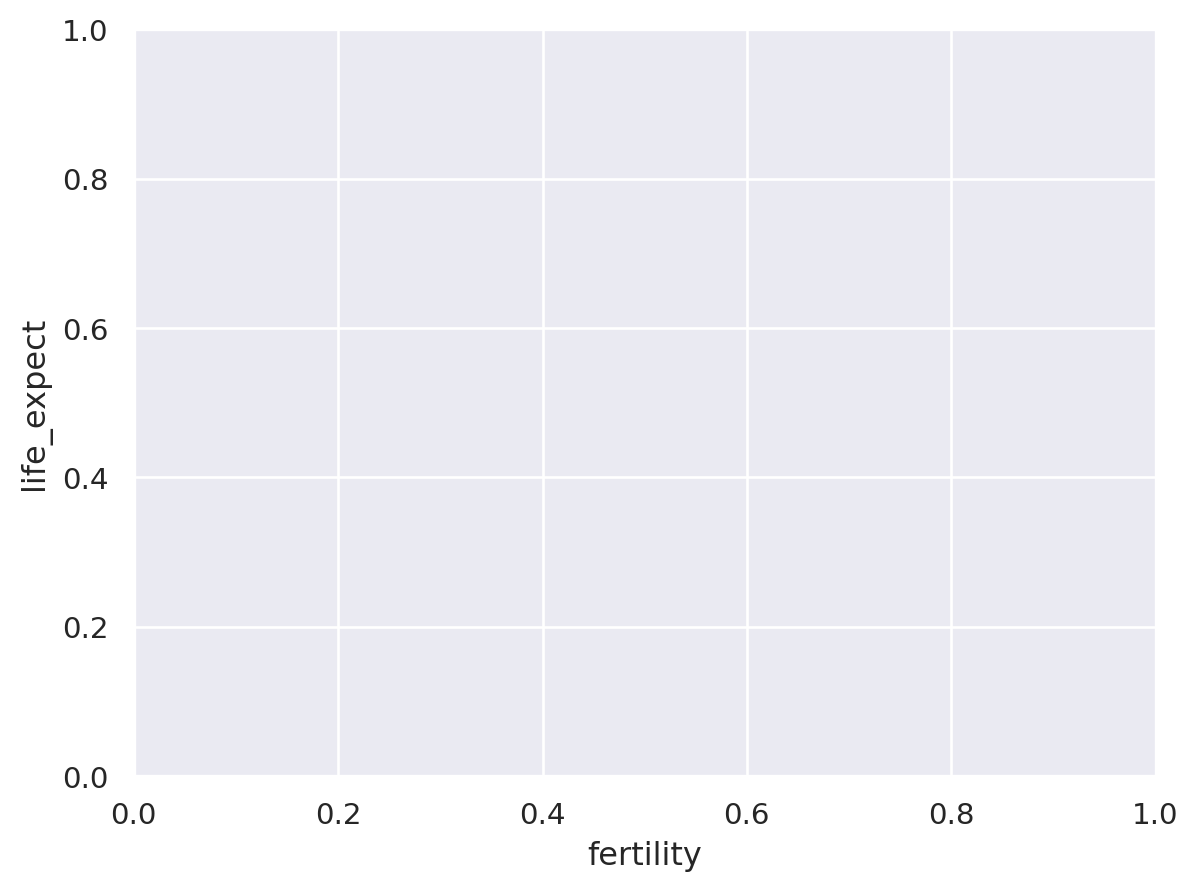

In [47]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
)

The axes are set, but there's nothing in the chart because no *mark* has been specified.  That's where the `add()` function comes in.

There are several types of marks available ([full list](https://seaborn.pydata.org/api.html#mark-objects)).  Some of the more common are [`so.Dot()`](https://seaborn.pydata.org/generated/seaborn.objects.Dot.html), [`so.Line()`](https://seaborn.pydata.org/generated/seaborn.objects.Line.html), [`so.Bar()`](https://seaborn.pydata.org/generated/seaborn.objects.Bar.html), and [`so.Area()`](https://seaborn.pydata.org/generated/seaborn.objects.Area.html).

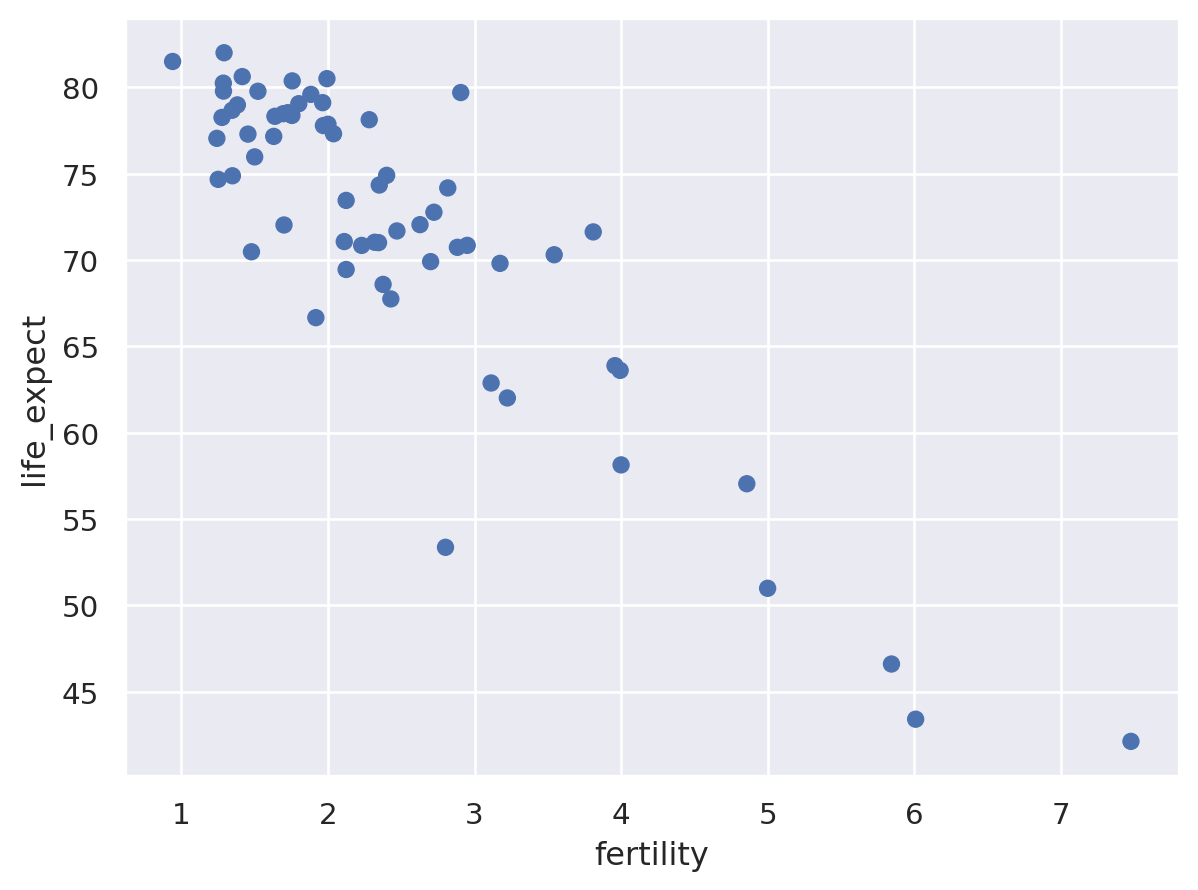

In [48]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
  .add(so.Dot())
)

## Adding Channels

We can apply additional channels to the marks by specifying them as parameters to `so.Plot()`.

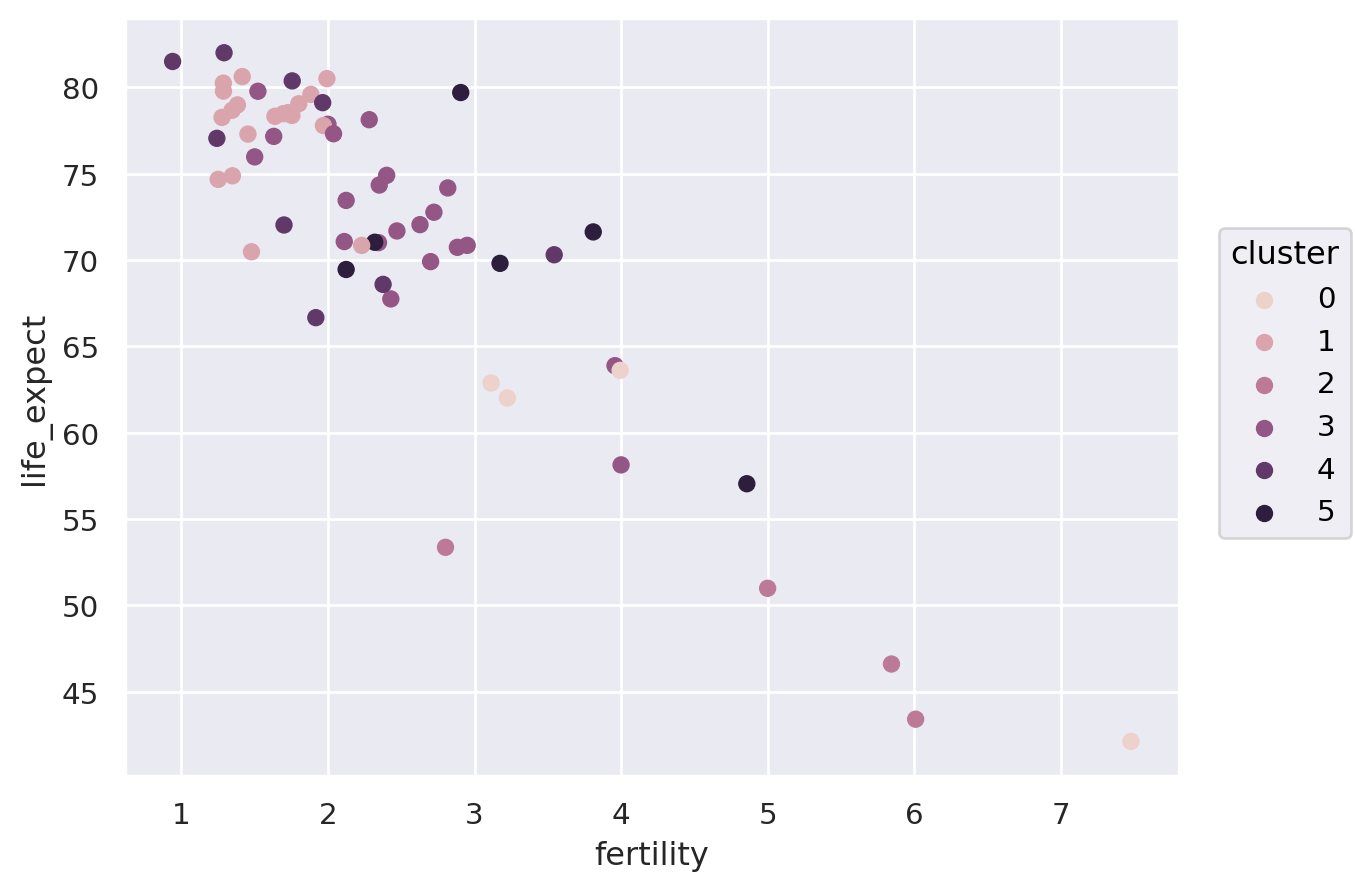

In [49]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster')
  .add(so.Dot())
)

A key thing to note is that when you set `color` in the `Plot()` function, it *maps* the channel to the data. If you set the color in the `Dot()` function, it sets the color directly (i.e., it's not tied to the data).

You can see the difference between *mapping* color and *setting* color below.

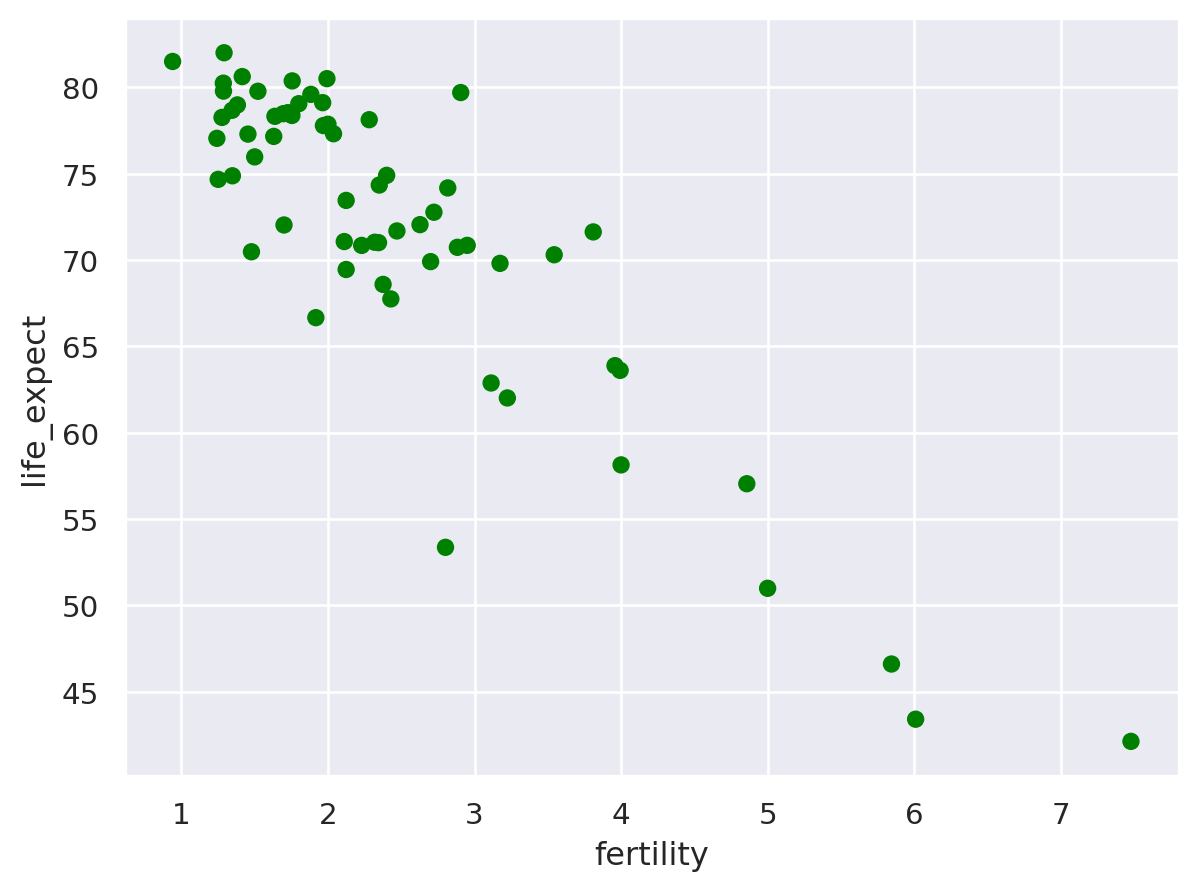

In [50]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect')
  .add(so.Dot(color="green"))
)

We can apply the shape channel to point marks using the [`marker`](https://seaborn.pydata.org/tutorial/properties.html#marker) property.

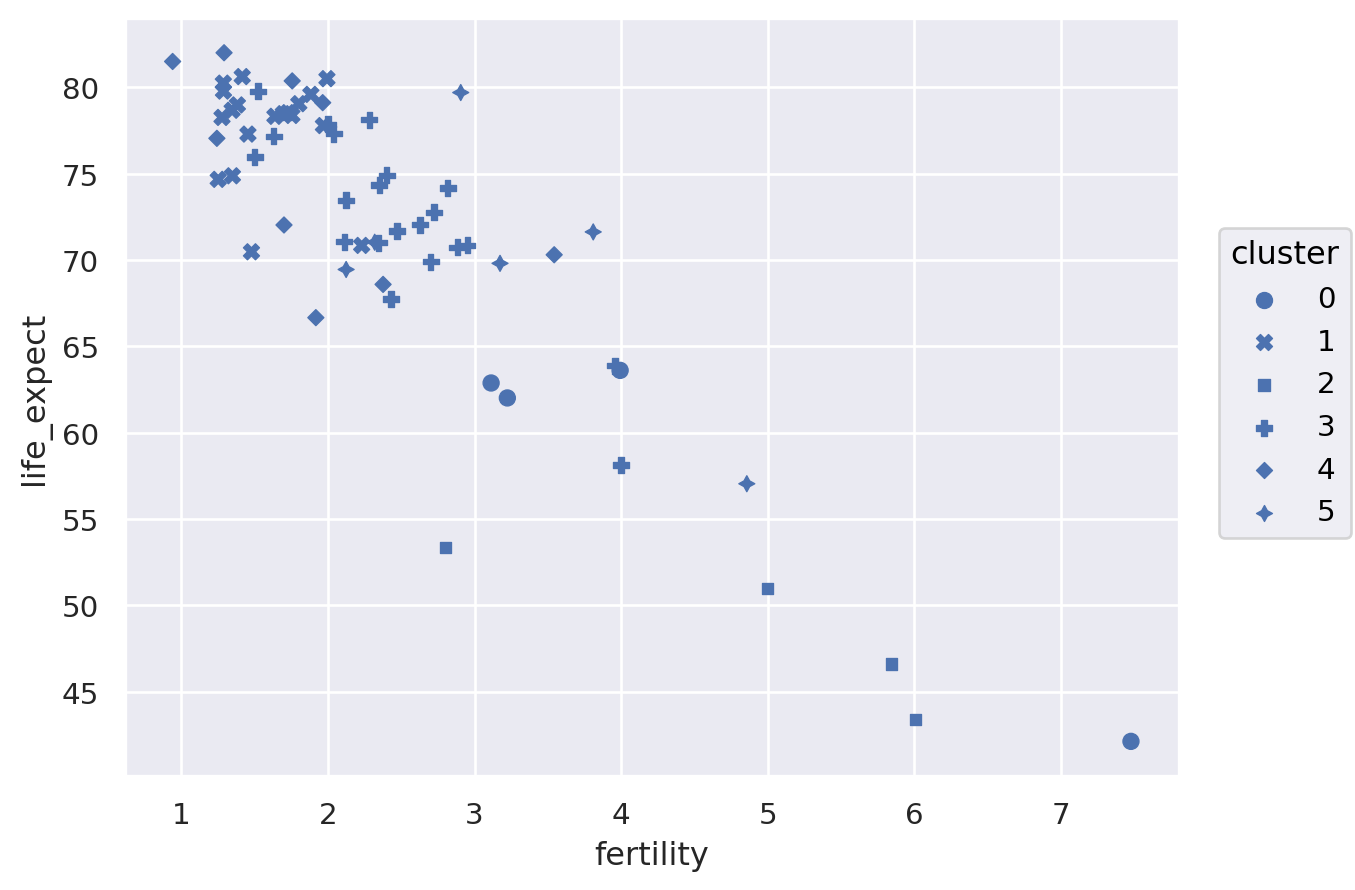

In [51]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         marker='cluster')
  .add(so.Dot())
)

We can add more channels, like combining color and size.

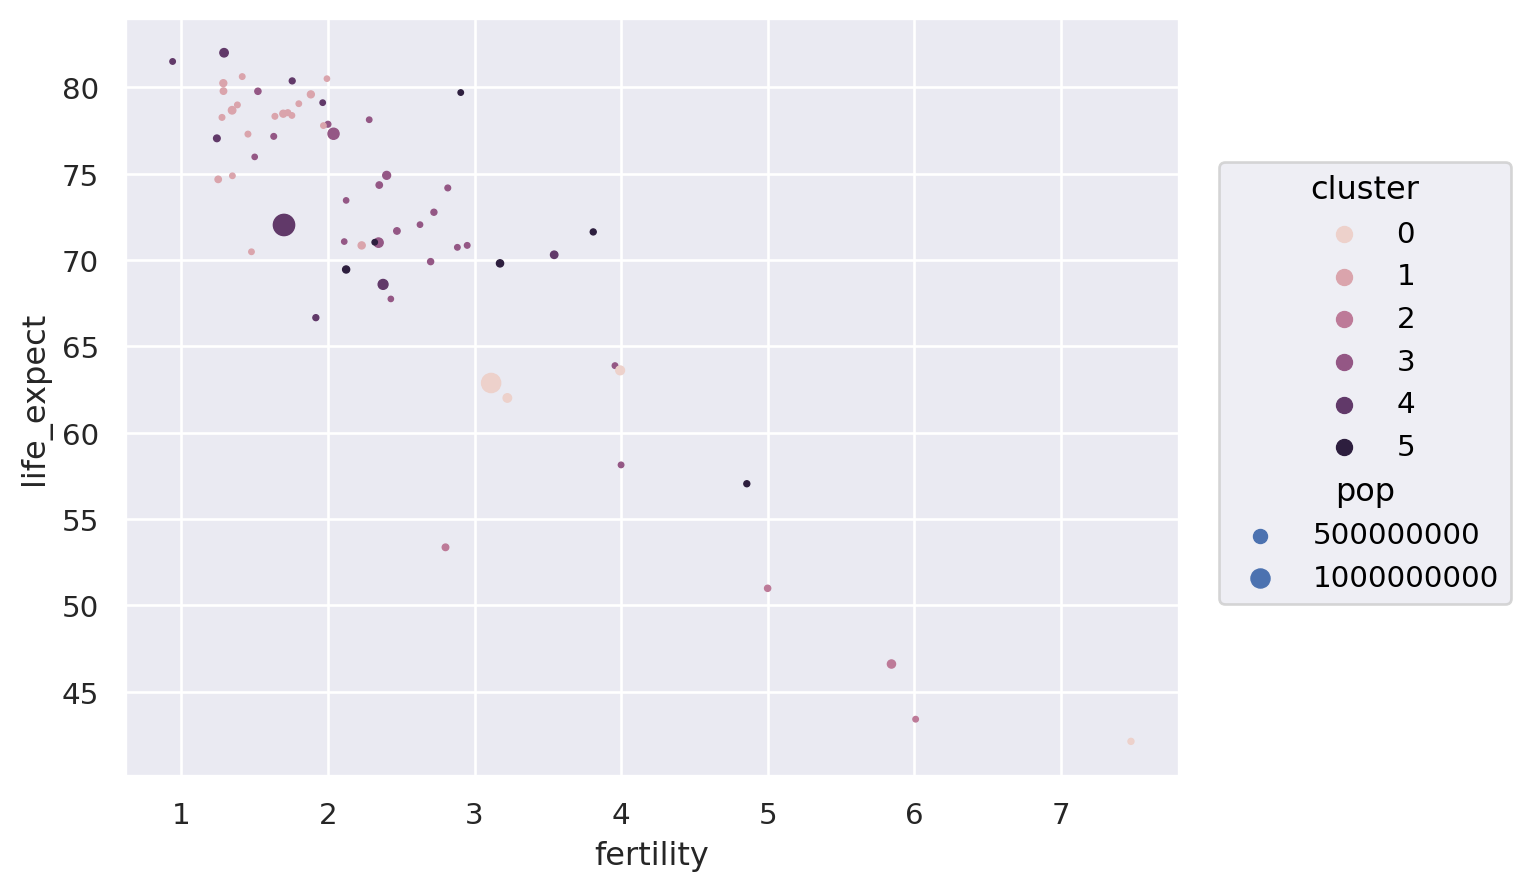

In [52]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

### Questions

🚨

<font color='red'>**Q1:**</font> *What happens if you set color in both `Plot()` and `Dot()`?*

👇 Create a new cell and enter the code below.

##By setting color in both Plot() and Dot(), the color specified in Dot() will override the color specified in Plot().##

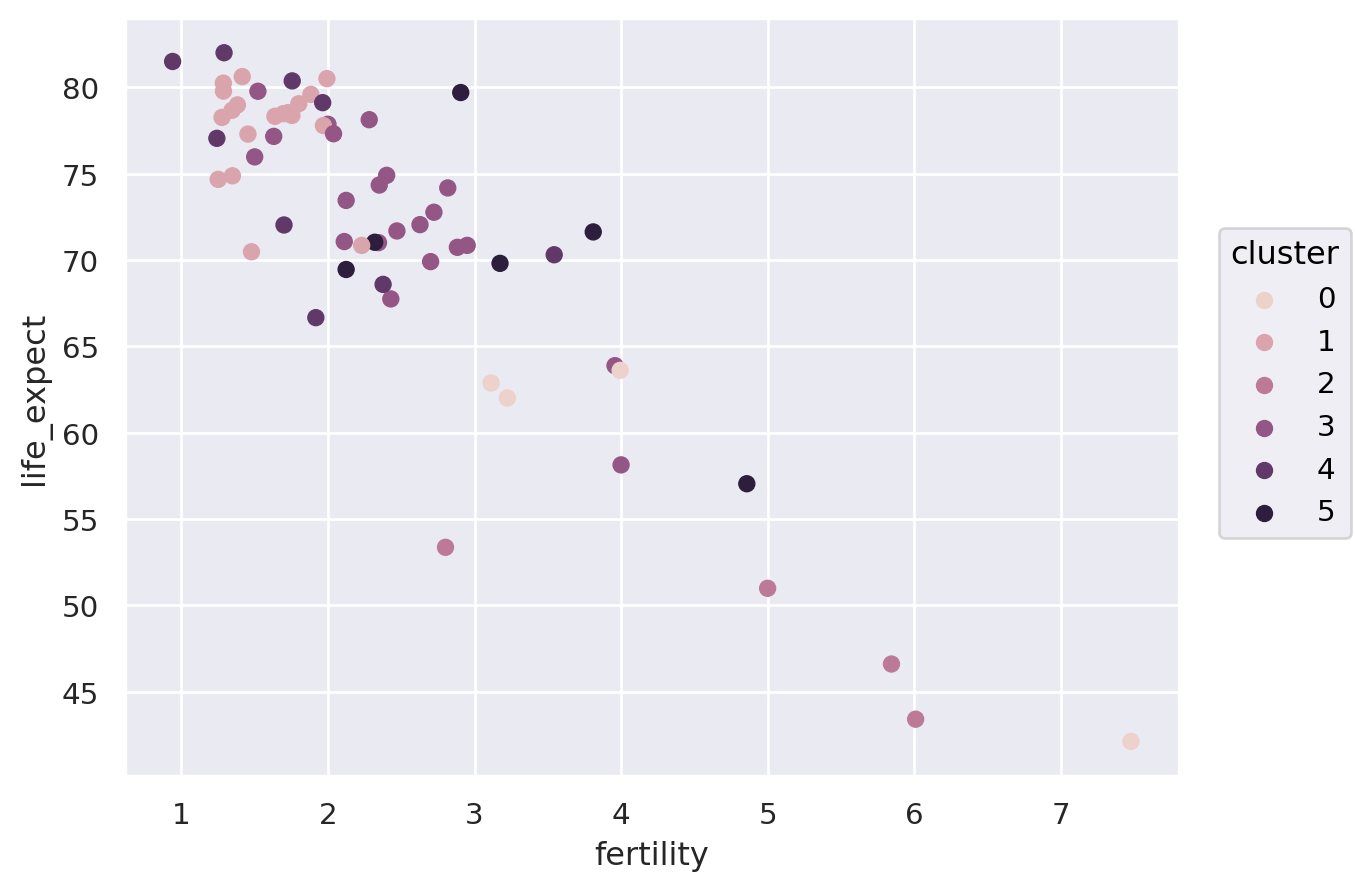

In [53]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster')
  .add(so.Dot())
)

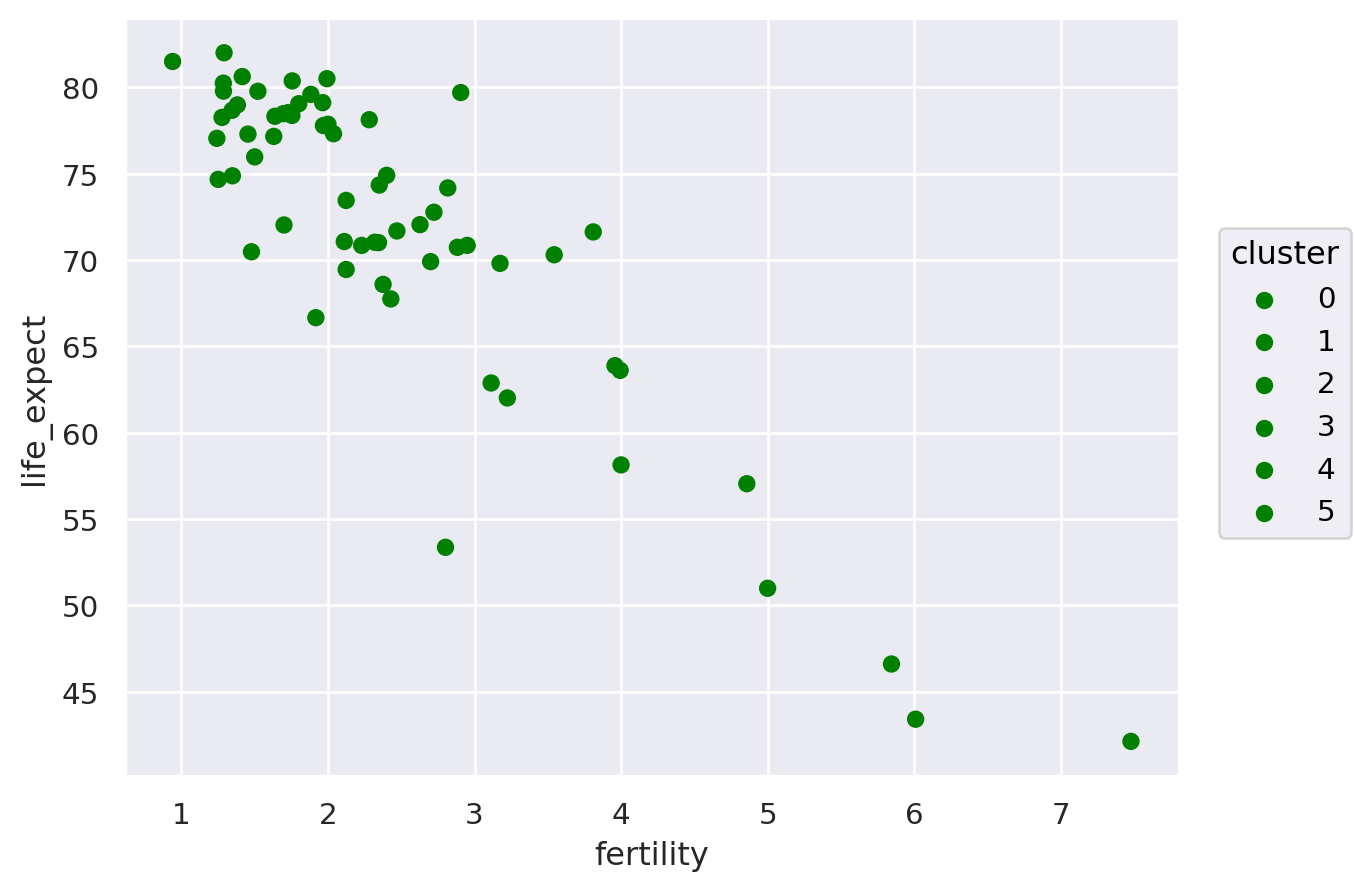

In [54]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color="cluster")
  .add(so.Dot(color="green"))
)

🚨

<font color='red'>**Q2:**</font> *Can you set the marker type in `Dot()` as you can with color?* (See [marker](https://seaborn.pydata.org/tutorial/properties.html#marker))

👇 Create a new cell and enter the code below.

##Yes, we can set the marker type in Dot() using the marker property.##

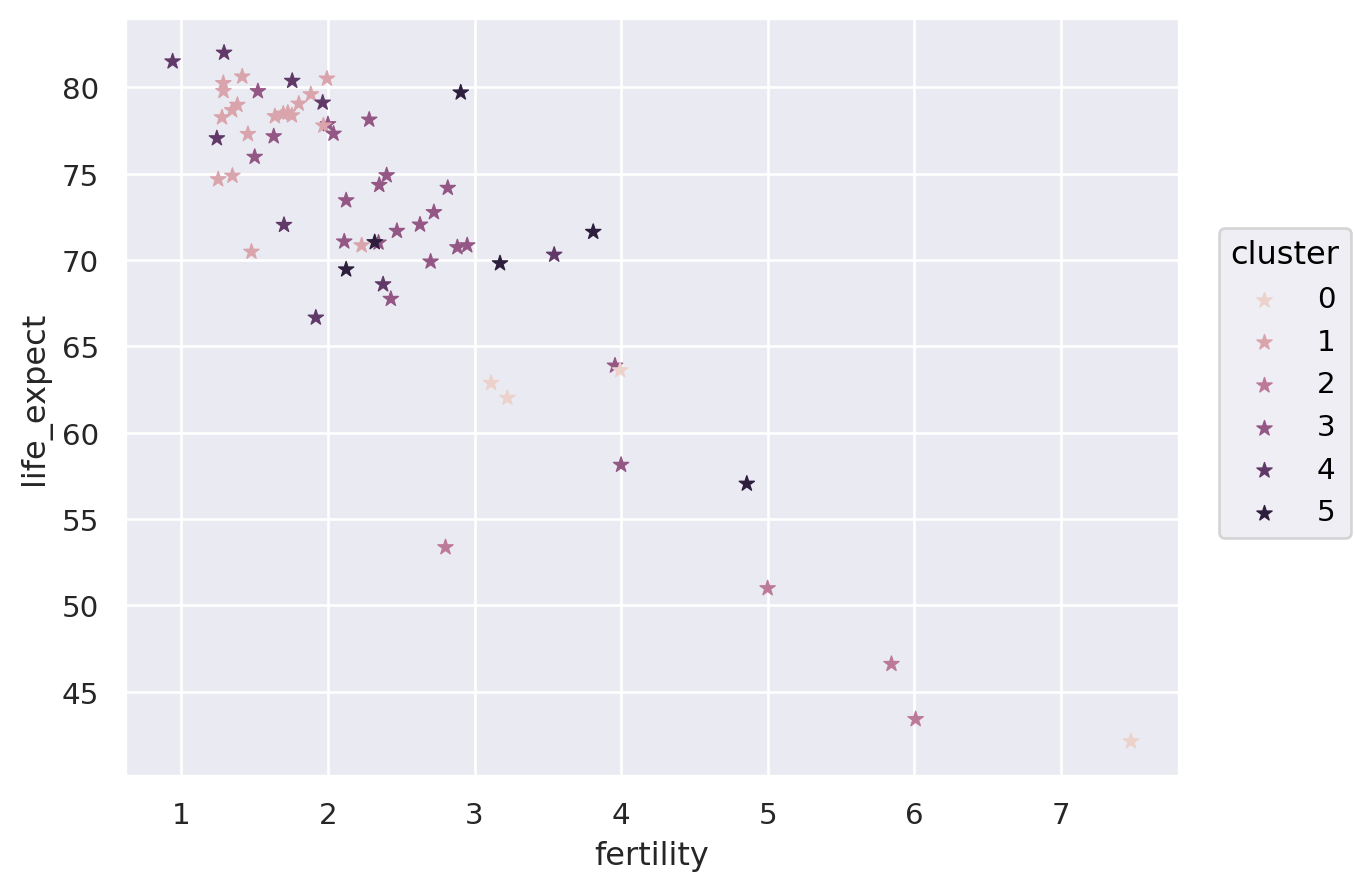

In [55]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color="cluster")
  .add(so.Dot(marker="*"))
)

🚨

<font color='red'>**Q3:**</font> *Can you map two different channels to the same attribute (called [redundant encoding](https://visualthinking.psych.northwestern.edu/projects/redundantencoding.html))?*  

👇 Create a new cell and enter the code below.

##Yes, we can map two different channels to the same attribute, which results in redundant encoding.##

In [66]:
df_2000['cluster'].unique()

array([0, 3, 4, 1, 5, 2])

In [69]:
marker_names = sns.get_dataset_names()

# Print the list of marker names
print(marker_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


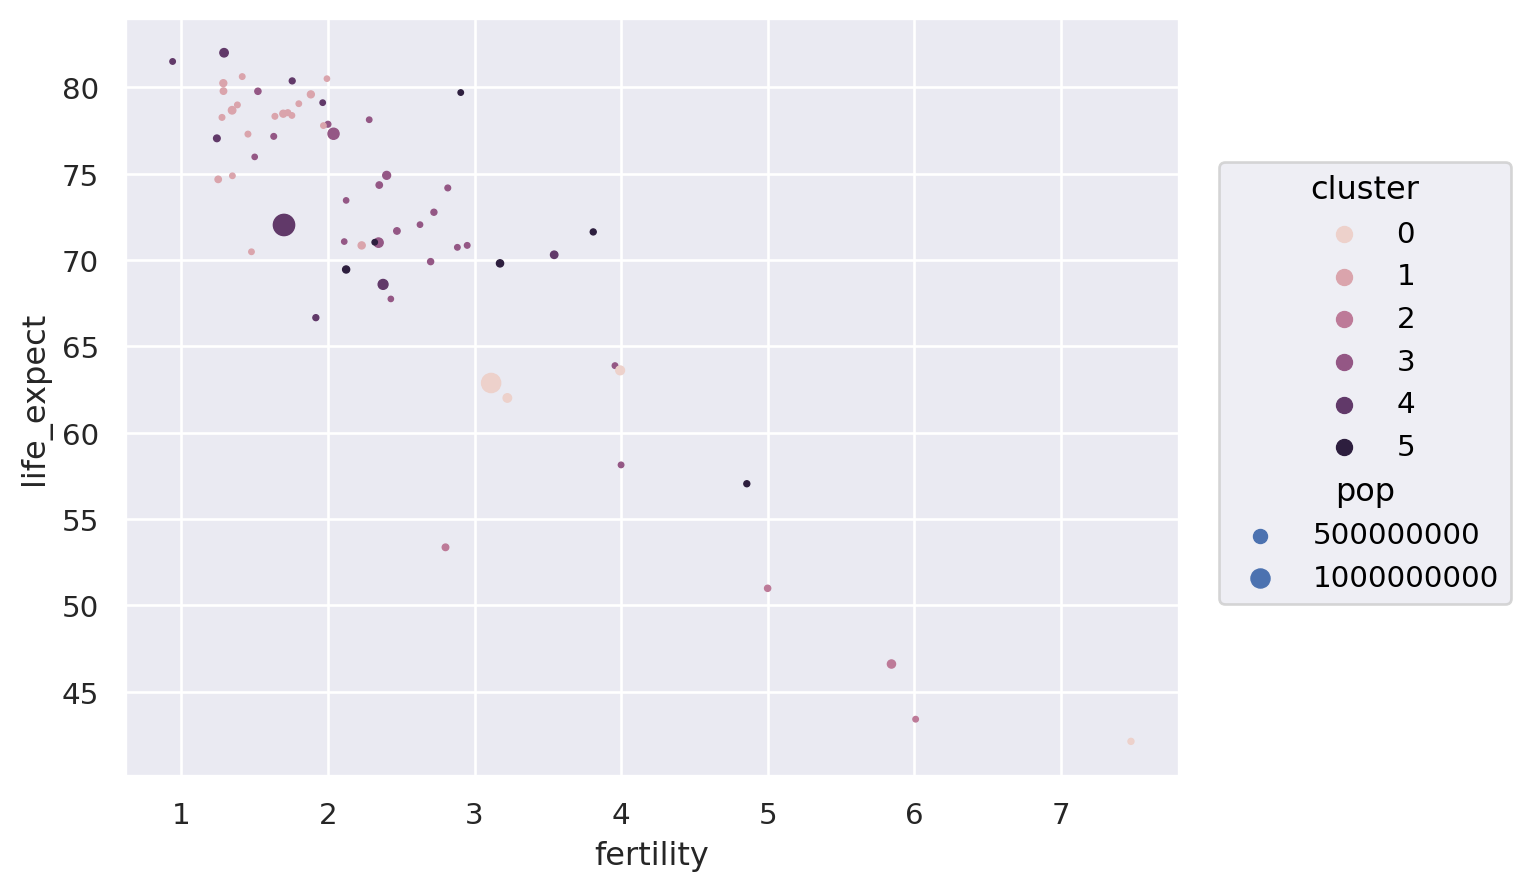

In [79]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

🚨

We've seen that when we map a channel other than x or y to an attribute, the values get displayed in the legend.

<font color='red'>**Q4:**</font>  *What happens if you map a channel to the `country` attribute, which has lots of unique items? Which Ch 5 principle, discriminability or separability, is being violated here?*

👇 Create a new cell and enter the code below.

##If we map a channel to the country attribute, which has lots of unique items, it violates the discriminability principle. This is because it becomes difficult to distinguish between the different colors or sizes when there are too many unique items.##

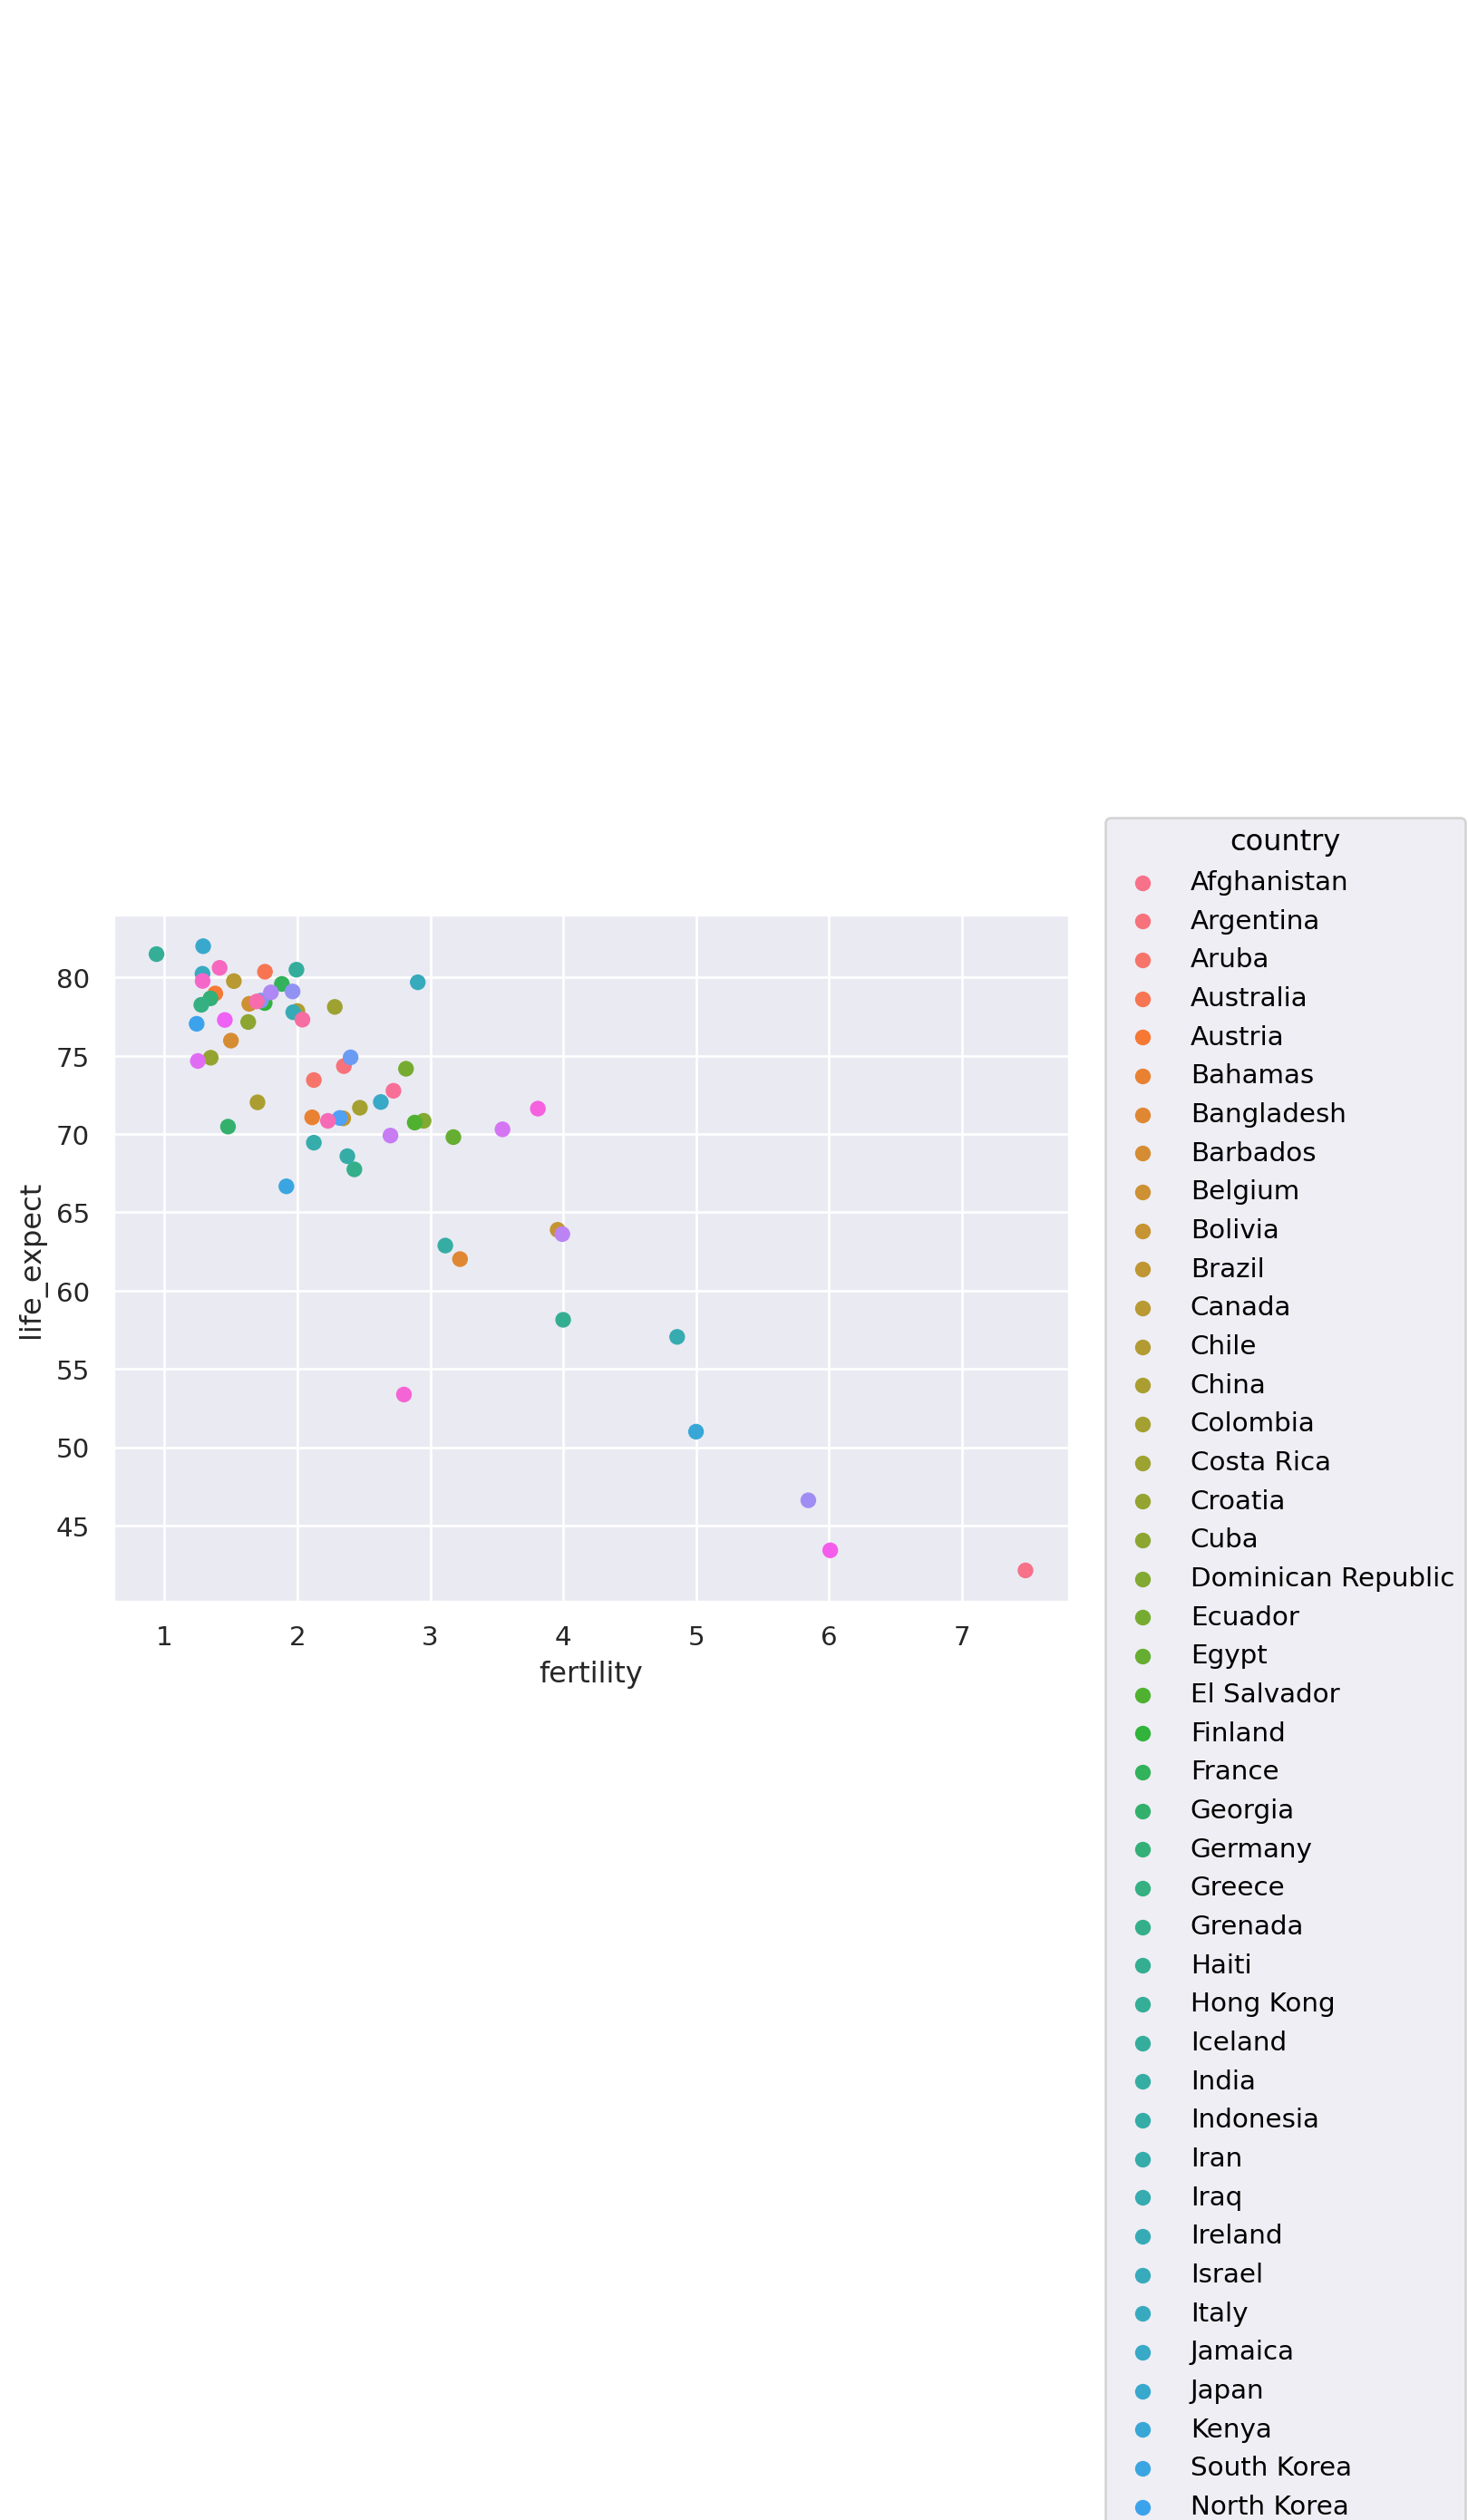

In [81]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='country')
  .add(so.Dot())
)

🚨

In the example above where we mapped color to `cluster`, the colors were ordered from lighter to darker. In this dataset, `cluster` is a categorical attribute.

<font color='red'>**Q5:**</font> *What Ch 5 principle is being violated when mapping an ordered channel to a categorical attribute?*

##When mapping an ordered channel to a categorical attribute, the principle of separability is violated. This is because the ordered channel implies some sort of quantitative relationship, which may not exist in the categorical attribute.##

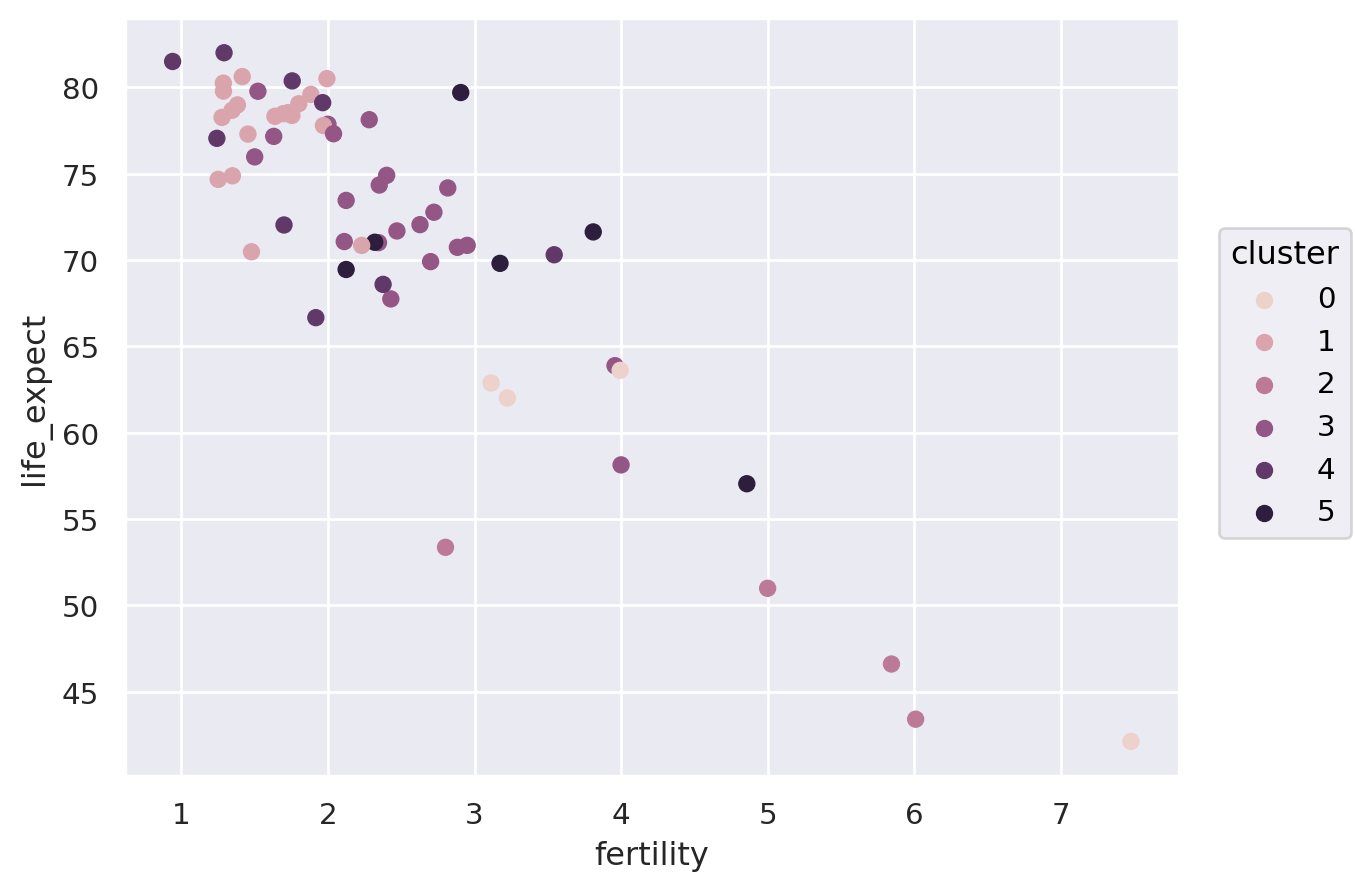

In [82]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster')
  .add(so.Dot())
)

🚨

In all of the above examples, we have mapped `fertility` and `life_expect` to the x and y channels (both representing position on common scale).

<font color='red'>**Q6:**</font> *What Ch 5 principle refers to the importance of the attribute matching the salience, or noticeability, of the channel? What does this say about the implied importance of `fertility` and `life_expect`?*

##The Ch 5 principle referring to the importance of the attribute matching the salience of the channel is called expressiveness. This principle implies that attributes that are more important should be mapped to more salient channels. In the context of fertility and life_expect, if they are mapped to the x and y axes, it implies that they are important attributes for the visualization.##

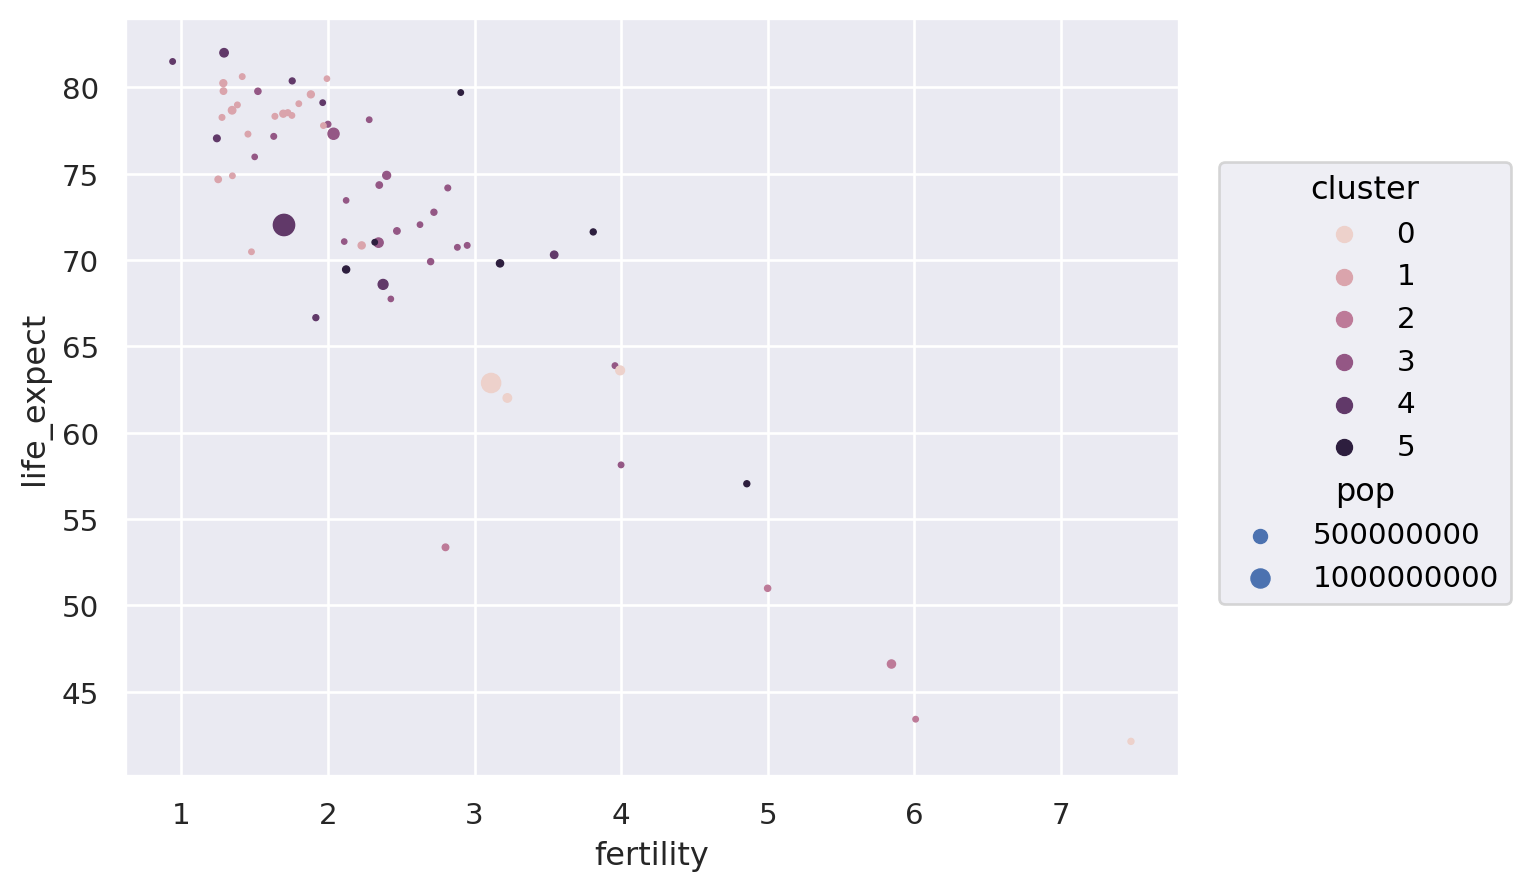

In [83]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

🚨

To test this out, put `pop` as one of the attributes on either the x or y axis and map `pointsize` to the attribute that you removed from x or y.

👇 Create a new cell and enter the code below.

<font color='red'>**Q7:**</font> *Are you still able to easily see the relationship between `fertility` and `life_expect`?*

##Mapping pop to one of the axes and pointsize to another attribute may obscure the relationship between fertility and life_expect, depending on the specific data and the range of values in pop.##

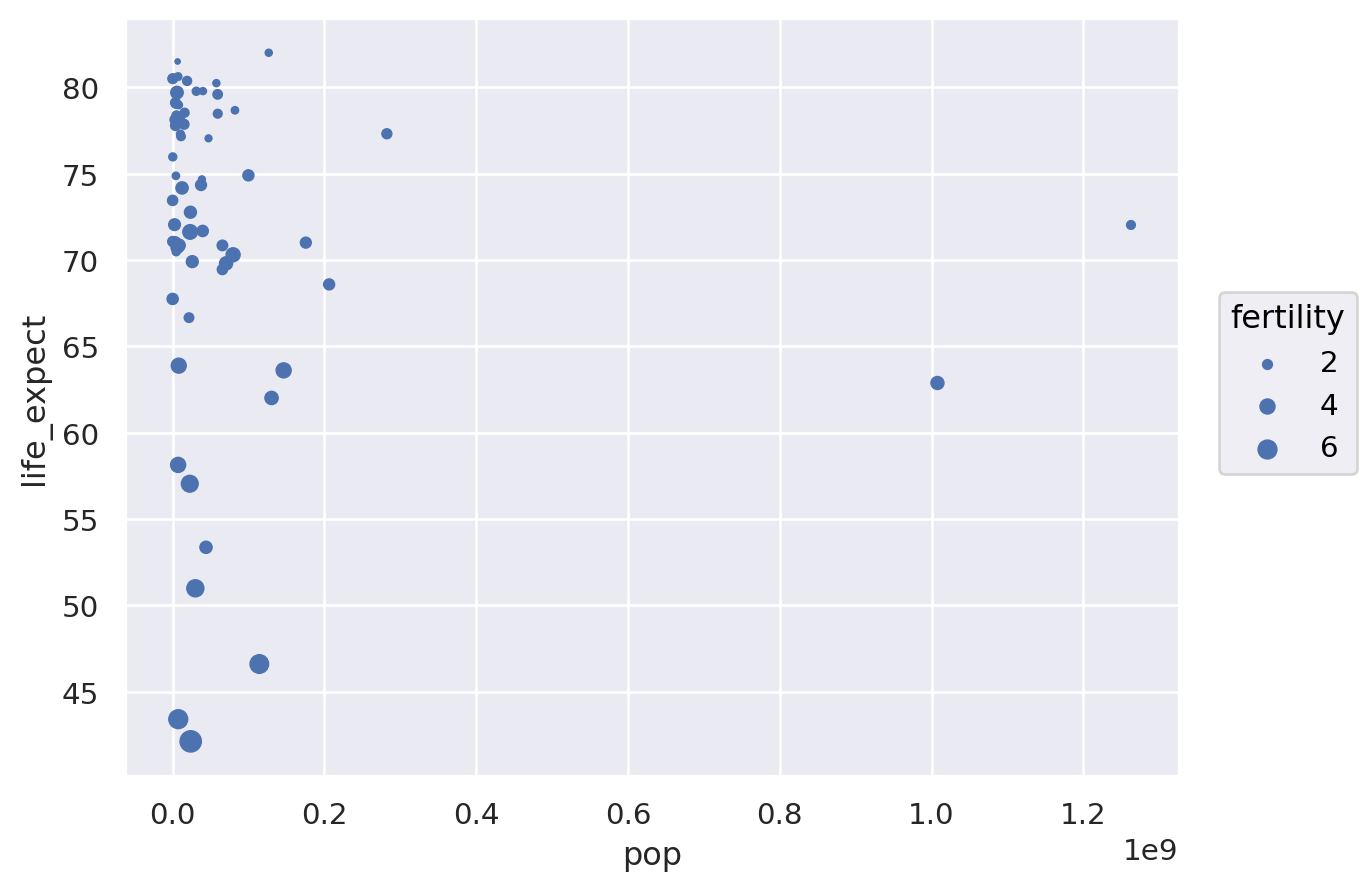

In [84]:
(so.Plot(data=df_2000,
         x='pop',
         y='life_expect',
         pointsize='fertility')
  .add(so.Dot())
)

🚨

<font color='red'>**Q8:**</font> *In the example above where we mapped pointsize to `pop` and color to `cluster`, what Ch 5 principle should we be concerned about?*

##In the example where we mapped pointsize to pop and color to cluster, we should be concerned about the principle of expressiveness.##

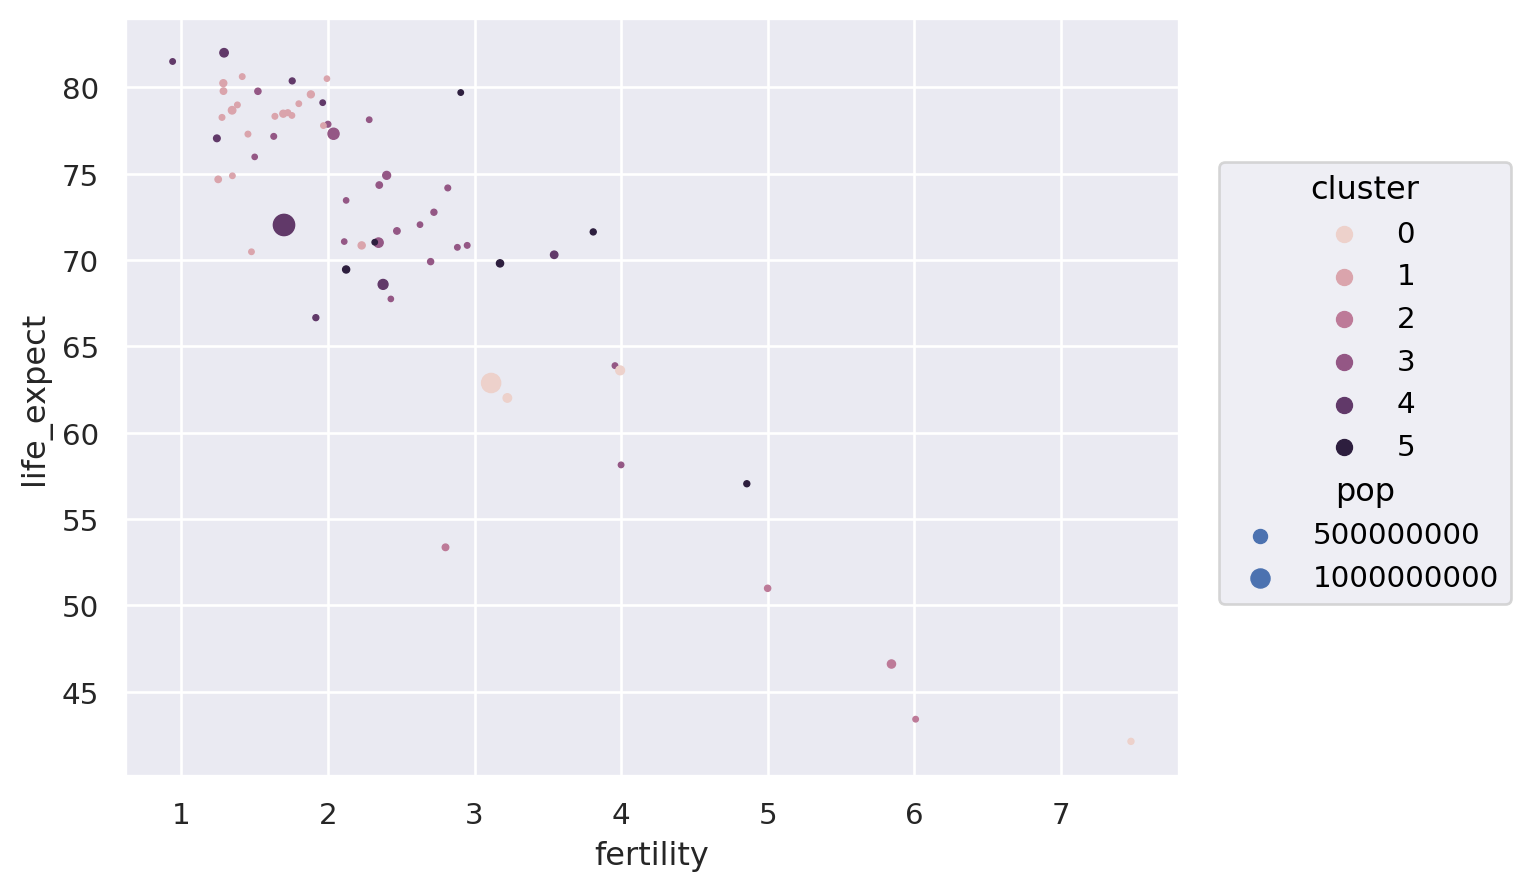

In [85]:
(so.Plot(data=df_2000,
         x='fertility',
         y='life_expect',
         color='cluster',
         pointsize='pop')
  .add(so.Dot())
)

## Marks Other than Dot

We can use a line mark as a connector between points.  We can add multiple marks by including more `add()` functions (in this example, both points and lines).

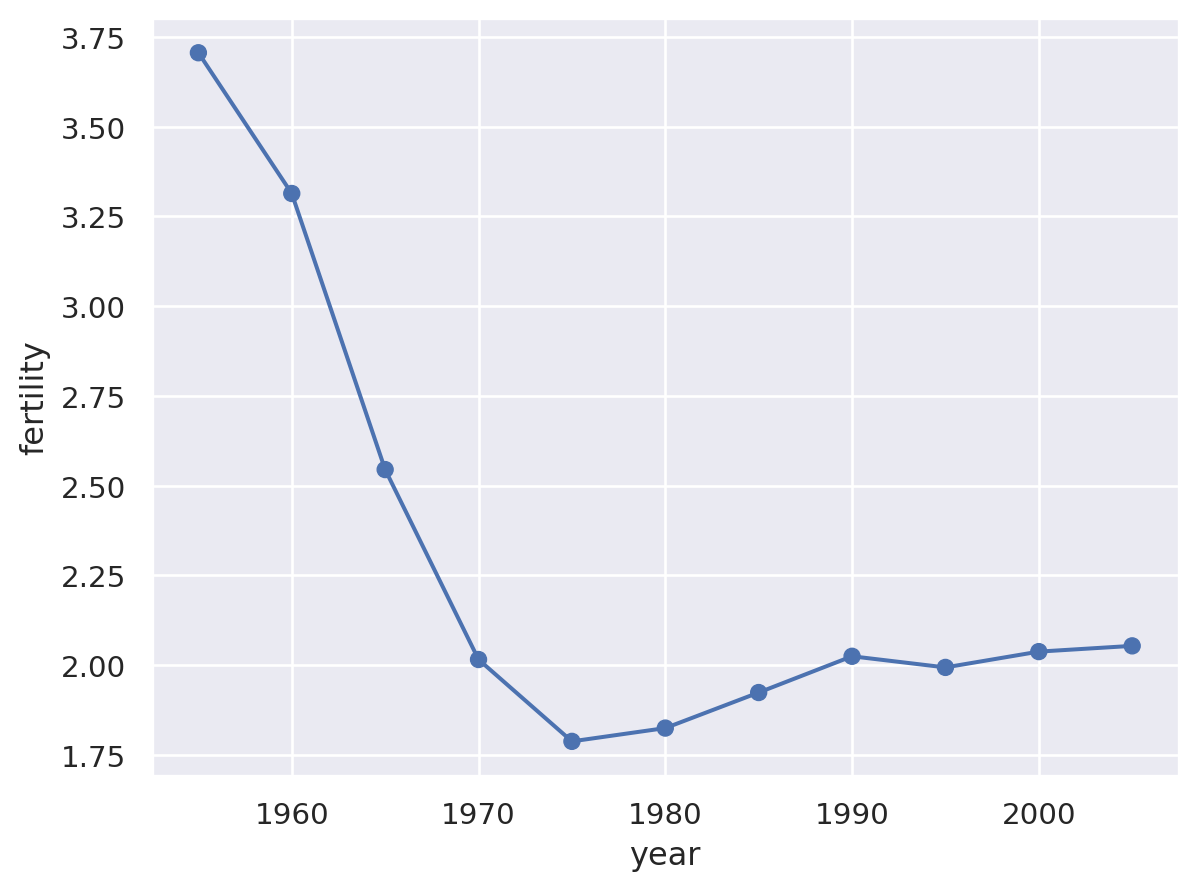

In [57]:
(so.Plot(data=df_US, x='year', y='fertility')
  .add(so.Dot())
  .add(so.Line())
)

We can use color to split items by a categorical value.  Below, we'll map the color channel to country name and when we use lines, we'll get a different color line for each country.

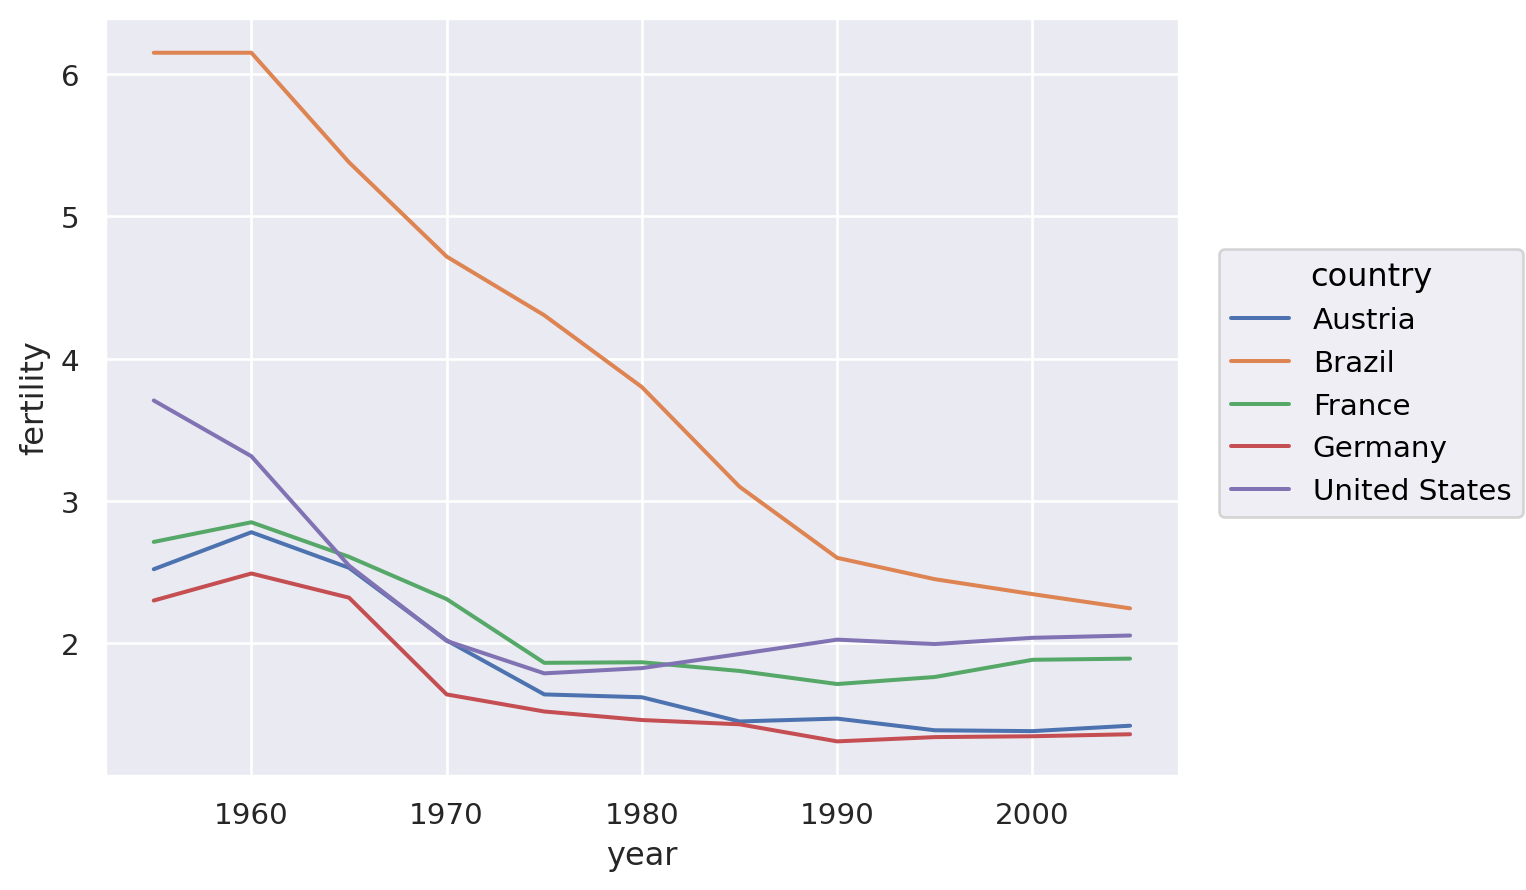

In [58]:
(so.Plot(data=df_5countries,
         x='year',
         y='fertility',
         color='country')
  .add(so.Line())
)

Note that the colors used here different *hues*, so they are appropriate for categorical data.

We can also show this same chart with a filled area.

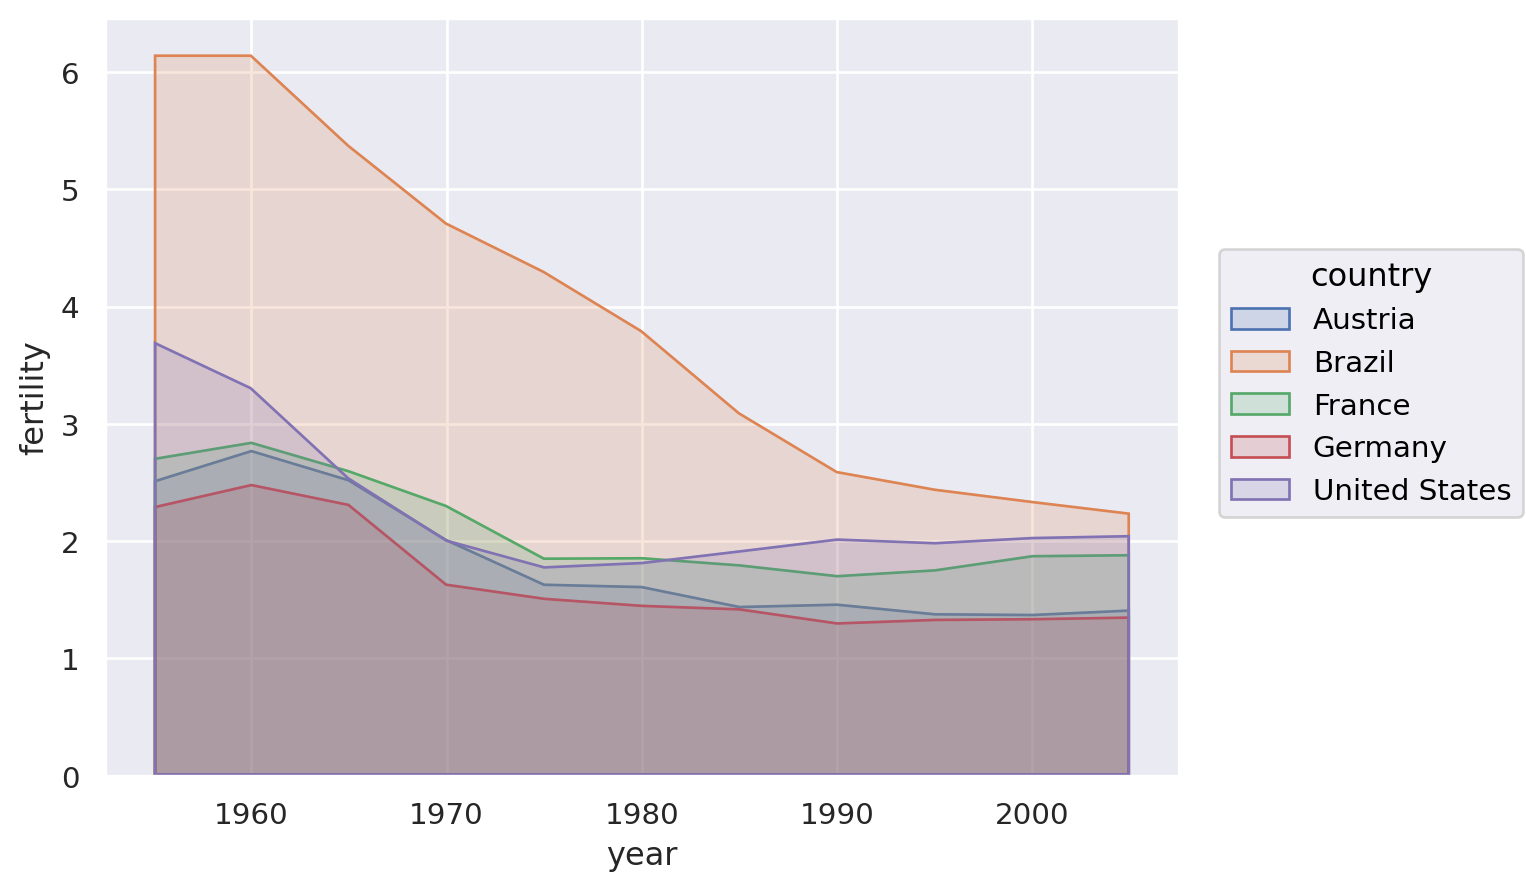

In [59]:
(so.Plot(data=df_5countries, x='year', y='fertility',
         color='country')
  .add(so.Area())
)

Below we use a line mark with horizontal spatial region based on country name and position on the vertical axis based on population. Although we call it a line mark in VAD terminology, it's called a bar mark in Seaborn. You can think of a bar as essentially a thick line.

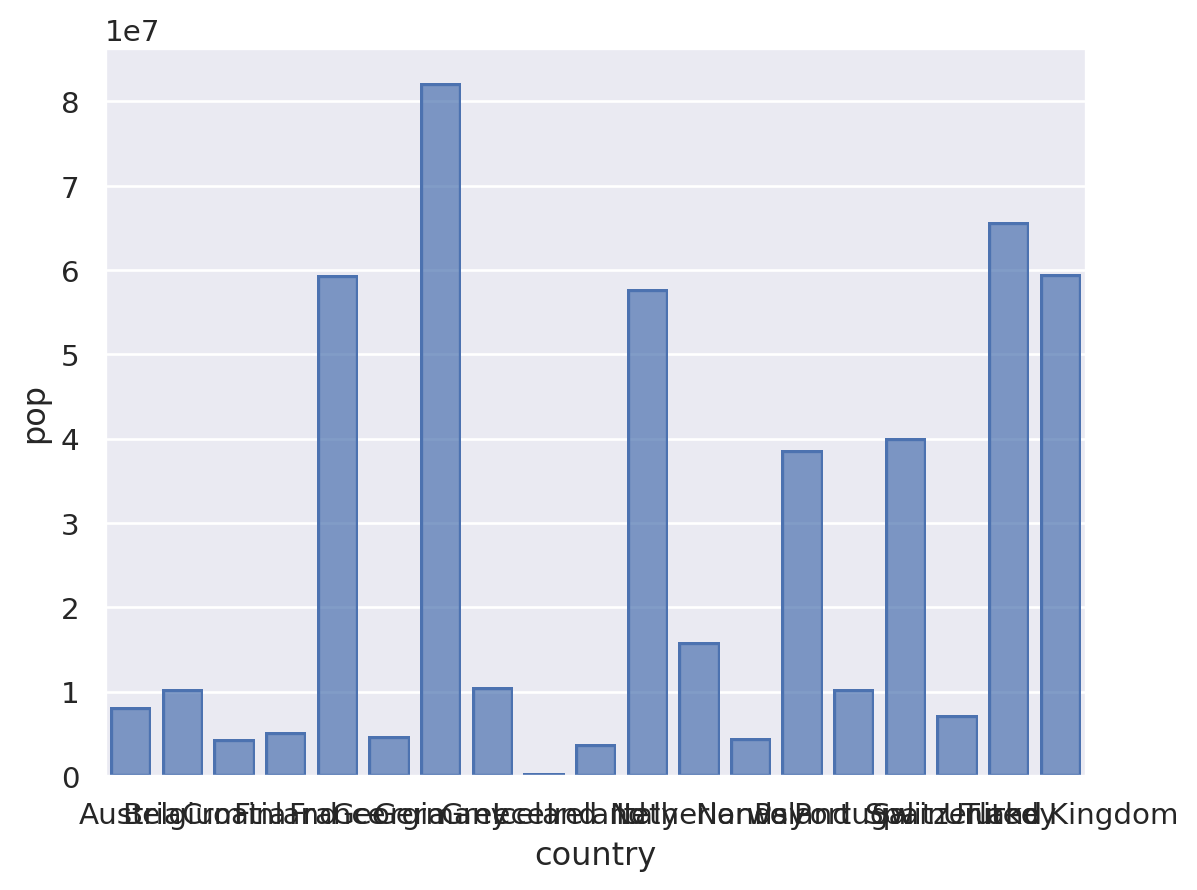

In [60]:
(so.Plot(data=df_2000c1, x='country', y='pop')
  .add(so.Bar())
)

We can flip this so it's more readable and map the country name to the vertical spatial region, just by swapping the x and y parameters.

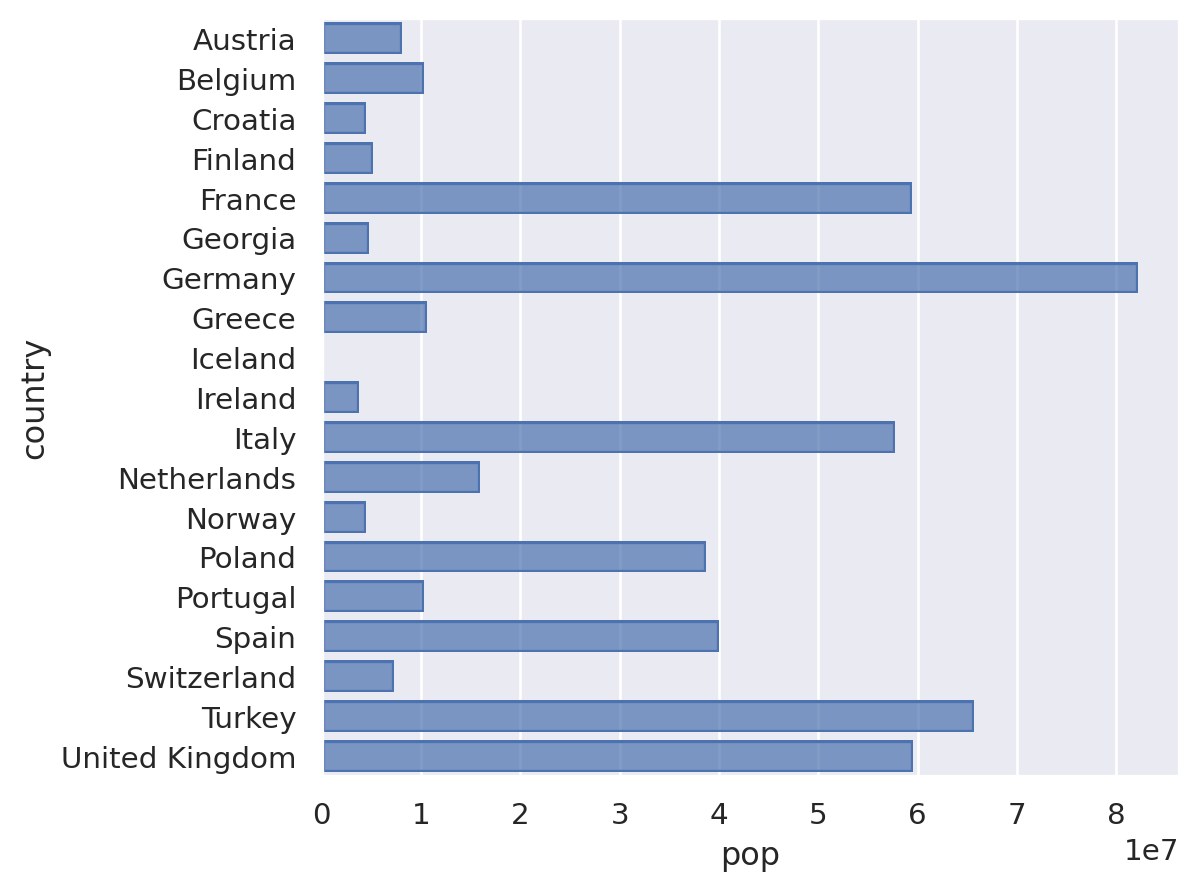

In [61]:
(so.Plot(data=df_2000c1, y='country', x='pop')
  .add(so.Bar())
)